In [19]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import f1_score
from sklearn.tree import export_graphviz
import matplotlib.pylab as plt
%matplotlib inline

In [42]:
data = np.genfromtxt('data.csv')

In [43]:
data.shape

(1000, 25)

In [44]:
X = data[:, :-1]
y = data[:, -1]

In [45]:
np.sum(y == 1)

700

In [46]:
np.sum(y == 2)

300

In [47]:
y -= 1

In [55]:
depth = []
metric = []
for max_depth in range(2, 50): 
    model = DecisionTreeClassifier(max_depth=max_depth)
    depth.append(max_depth)
    metric.append(np.mean(cross_val_score(model, X, y, cv=5, scoring='f1')))

Качество на кросс валидайии в зависимости от максимальной глубины

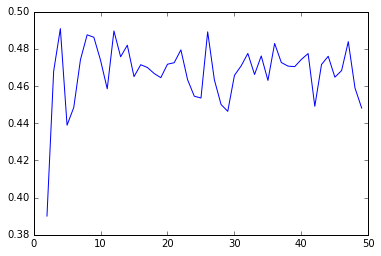

In [56]:
plt.plot(depth, metric)

In [63]:
depth = []
metric = []
for max_depth in range(2, 50): 
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X, y)
    depth.append(max_depth)
    metric.append(f1_score(y, model.predict(X)))

Качество на обучающей выборке в зависимости от максимальной глубины

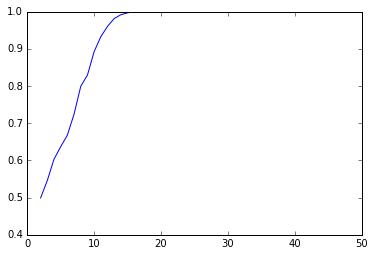

In [64]:
plt.plot(depth, metric)

In [59]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [60]:
with open("tree.dot", 'w') as f:
    f = export_graphviz(model, out_file=f)

Не очень ясно что значит 1ый признак, но он очень важен. Видимо он показывает что-то типа отношения зарплаты к сумме текущей задолжности. Если он больше 2, то скорее всего объект лежит в 1ом классе.

Если 1 ый признак меньше либо равен 2, то следующим по важности признаком является срок на который выдается кредит (если я правильно понял). Если он не слишком большой (22 и меньше), то вероятность принадлежности первому классу возрастает (с 303:240 до 200:106). Иначе возрастет вероятность принадлежности ко второму класу.

Если 1ый признак больше 2, то следующим по важности признаком является 10ый. Я использую german.data-numeric, а там не совсем понятно что за столбцы. Так что я не знаю что это за признак, но если он больше 3, то объект почти наверное принадлежит первому классу. Иначе он тоже скорее лежит в первом классе, но вероятность меньше.